<!--NAVIGATION-->
< [聚合：Min, Max, 以及其他](02.04-Computation-on-arrays-aggregates.ipynb) | [目录](Index.ipynb) | [比较，遮盖和布尔逻辑](02.06-Boolean-Arrays-and-Masks.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/02.05-Computation-on-arrays-broadcasting.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Computation on Arrays: Broadcasting
# 在數組上計算：廣播

> We saw in the previous section how NumPy's universal functions can be used to *vectorize* operations and thereby remove slow Python loops.
Another means of vectorizing operations is to use NumPy's *broadcasting* functionality.
Broadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

我們在前面的章節中學習了NumPy的通用函數，它們用來對數組進行*向量化*操作，從而拋棄了性能低下的Python循環。還有一種對NumPy數組進行向量化操作的方式我們稱為*廣播*。廣播簡單來說就是一整套用於在不同尺寸或形狀的數組之間進行二元ufuncs運算（如加法、減法、乘法等）的規則。

## Introducing Broadcasting

## 廣播簡介


> We can think of this as an operation that stretches or duplicates the value ``5`` into the array ``[5, 5, 5]``, and adds the results.
The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

我們將標量擴展成了一個一維的數組`[5, 5, 5]`，然後在和`a`進行了加法運算。 NumPy的廣播方式並不是真的需要將元素複製然後擴展，但是這對於理解廣播的運行方式很有幫助。我們可以很簡單的將上面的情形推廣到更高緯度的數組上。

In [1]:
import numpy as np
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [2]:
a + 5

array([5, 6, 7])

> Here the one-dimensional array ``a`` is stretched, or broadcast across the second dimension in order to match the shape of ``M``.While these examples are relatively easy to understand, more complicated cases can involve broadcasting of both arrays. Consider the following example:

上例中一維數組`a`在第二個維度上進行了擴展或者廣播，這樣才能符合`M`的形狀。上面兩個例子相對來說非常容易理解，但是當參與運算的兩個數組都需要廣播時，情況就相對複雜一些了。看下面的例子：

In [3]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [4]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [5]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

> Just as before we stretched or broadcasted one value to match the shape of the other, here we've stretched *both* ``a`` and ``b`` to match a common shape, and the result is a two-dimensional array!
The geometry of these examples is visualized in the following figure (Code to produce this plot can be found in the [appendix](06.00-Figure-Code.ipynb#Broadcasting), and is adapted from source published in the [astroML](http://astroml.org) documentation. Used by permission).

前面例子中我們只對其中一個數組進行了擴展或者廣播，上例中我們需要對`a`和`b`兩個數組都進行廣播才能滿足雙方是相同的形狀，最後的結果是一個二維的數組。上面例子可以用下面的圖來進行說明（生成這些圖像的代碼可以在[附錄](06.00-Figure-Code.ipynb#Broadcasting)中找到，其中部分使用了經過授權的[astroML](http://astroml.org)網站文檔中的代碼）。

![Broadcasting Visual](figures/02.05-broadcasting.png)

## Rules of Broadcasting

## 廣播的規則

> Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

在NumPy中應用廣播不是隨意的，而是需要遵從嚴格的一套規則：

- 規則1：如果兩個數組有著不同的維度，維度較小的那個數組會沿著最前（或最左）的維度進行擴增，擴增的維度尺寸為1，這時兩個數組具有相同的維度。
- 規則2：如果兩個數組形狀在任何某個維度上存在不相同，那麼兩個數組中形狀為1的維度都會廣播到另一個數組對應唯獨的尺寸，最終具有相同的形狀。
- 規則3：如果兩個數組在同一個維度上具有不為1的不同長度，那麼將產生一個錯誤。

### Broadcasting example 1 

我們先看一下一個二維數組和一個一維數組相加：

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

> We see by rule 1 that the array ``a`` has fewer dimensions, so we pad it on the left with ones:

依據規則1，數組`a`的維度較少，因此首先對其進行維度擴增，我們在其最前面（最左邊）增加一個維度，長度為1。此時兩個數組的形狀變為：

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

> By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

依據規則2，我們可以看到雙方在第一維度上不相同，因此我們將第一維度具有長度1的`a`的第一維度擴展為2。此時雙方的形狀變為：

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

> The shapes match, and we see that the final shape will be ``(2, 3)``:

經過變換之後，雙方形狀一致，可以進行加法運算了，我們可以預知最終結果的形狀為`(2, 3)`：

In [6]:
M = np.ones((2, 3))
a = np.arange(3)
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Broadcasting example 2

讓我們看一個兩個數組都需要廣播的情況：

> Again, we'll start by writing out the shape of the arrays:

開始時雙方的形狀為：

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

> Rule 1 says we must pad the shape of ``b`` with ones:

由規則1我們需要將數組`b`擴增第一維度，長度為1：

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

> And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

由規則2我們需要將數組`a`的第二維度擴展為3，還需要將數組`b`的第一維度擴展為3，得到：

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

In [7]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting example 3

> This is just a slightly different situation than in the first example: the matrix ``M`` is transposed.
How does this affect the calculation? The shape of the arrays are

這個例子和例子1有一點點區別，那就是本例中的`M`是例子1中`M`的轉置矩陣。它們的形狀是：

- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

> Again, rule 1 tells us that we must pad the shape of ``a`` with ones:

由規則1我們需要在數組`a`上擴增第一維度，長度為1：

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

> By rule 2, the first dimension of ``a`` is stretched to match that of ``M``:

由規則2我們需要將數組`a`的第一維度擴展為3才能與數組`M`保持一致，除此之外雙方都沒有長度為1的維度了：

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

> Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:

觀察得到的形狀，你可以發現這個結果滿足規則3，雙方的各維度長度不完全一致且不為1，因此無法完成廣播，最終會產生錯誤：

In [8]:
M = np.ones((3, 2))
a = np.arange(3)
# M + a

> If right-side padding is what you'd like, you can do this explicitly by reshaping the array (we'll use the ``np.newaxis`` keyword introduced in [The Basics of NumPy Arrays](02.02-The-Basics-Of-NumPy-Arrays.ipynb)):

如果你確實希望進行右維度擴增的話，你必須明確指定。利用我們在[NumPy數組基礎](02.02-The-Basics-Of-NumPy-Arrays.ipynb)中介紹的`np.newaxis`屬性可以進行這個操作：

In [9]:
a[:, np.newaxis].shape

(3, 1)

In [10]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

> Also note that while we've been focusing on the ``+`` operator here, these broadcasting rules apply to *any* binary ``ufunc``.
For example, here is the ``logaddexp(a, b)`` function, which computes ``log(exp(a) + exp(b))`` with more precision than the naive approach:

還要說明的是，上面的例子中我們都是使用加法進行說明，實際上廣播可以應用到*任何*的二元ufunc上。例如下面我們採用`logaddexp(a, b)`函數求值，這個函數計算的是$\log(e^a + e^b)$的值，使用這個函數能比採用原始的exp和log函數進行計算得到更高的精度：

In [11]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

## Broadcasting in Practice

## 廣播規則實踐

### Centering an array 中心化數組

> In the previous section, we saw that ufuncs allow a NumPy user to remove the need to explicitly write slow Python loops. Broadcasting extends this ability.
One commonly seen example is when centering an array of data.
Imagine you have an array of 10 observations, each of which consists of 3 values.
Using the standard convention (see [Data Representation in Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb#Data-Representation-in-Scikit-Learn)), we'll store this in a $10 \times 3$ array:

在前一節中 ufuncs提供了我們可以避免使用Python循環的低效方式，而廣播則大大擴展了這種能力。一個常見的例子就是我們需要將數據集進行中心化。例如我們我們進行了10次採樣觀測，每次都會得到3個數據值。按照慣例（參見[Scikit-Learn數據表現方式](05.02-Introducing-Scikit-Learn.ipynb#Data-Representation-in-Scikit-Learn)），我們可以將這些數據存成一個$10 \times 3$的數組：

In [12]:
X = np.random.random((10, 3))

In [13]:
Xmean = X.mean(0)
Xmean

array([0.46138824, 0.50187163, 0.53311307])

In [14]:
X_centered = X - Xmean
X_centered.mean(0)  #考慮到機器精度情況，平均值已經等於0了。

array([ 6.66133815e-17, -3.33066907e-17,  0.00000000e+00])

### Plotting a two-dimensional function

### 繪製二維函數的圖形

> One place that broadcasting is very useful is in displaying images based on two-dimensional functions.
If we want to define a function $z = f(x, y)$, broadcasting can be used to compute the function across the grid:

廣播還有一個很有用的場景，就是當你需要繪製一個二維函數的圖像時。如果我們希望定義一個函數$z = f(x, y)$，廣播可以被用來計算二維平面上每個網格的數值：

In [15]:
# x和y都是0~5範圍平均分的50個點
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

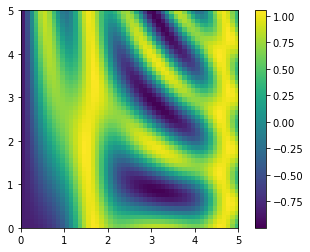

In [17]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

> The result is a compelling visualization of the two-dimensional function.

上面的圖形以一種極其吸引人的方式為我們展現了二維函數的分佈情況。

<!--NAVIGATION-->
< [聚合：Min, Max, 以及其他](02.04-Computation-on-arrays-aggregates.ipynb) | [目录](Index.ipynb) | [比较，遮盖和布尔逻辑](02.06-Boolean-Arrays-and-Masks.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/02.05-Computation-on-arrays-broadcasting.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
